# Mortgage Default Project - AWS   


The Federal National Mortgage Association (FNMA), also known as Fannie Mae, is a government sponsored
corporation founded in 1938 whose primary purpose is to provide liquidity to the mortgage market. Essentially, Fannie Mae purchases mortgage loans from primary lenders , the financial institutions that interact with borrowers, like Bank of America and Wells Fargo, among several others.
The primary lenders' originators follow Fannie Mae’s underwriting standards, i.e. the loans that are
originated need to meet certain criteria set by Fannie Mae to qualify for sale to Fannie Mae. After these
mortgages are acquired, Fannie Mae sells them as securities in the bond market. In this context, securitization
means that Fannie Mae creates pools of these mortgages and issues bonds against them. The bond investors
purchase the bonds and they are paid back overtime by the monthly mortgage payments done by the mortgage
borrowers.
Unfortunately, however, not all borrowers whose loans have been purchased by Fannie Mae are able to repay
their mortgages in a timely manner, and many end up defaulting at some point. Fannie Mae guarantees the
mortgage payments for the mortgage borrowers that defaulted and pays the principal amount as lump sum
payment when the loan becomes 3 months arrears. Also, bond investors are paid a lump sum when the
mortgage borrowers prepays, i.e. instead of getting monthly payments for the rest of the life of the mortgage,
the bond investors get early principal paydown.
Both defaults and prepayments create “duration” risk for the bond investors since any mortgages that are paid
before the maturity date translates into loss of interest for the bond holders.
In fact, between 2006 and 2008, many hundreds of thousands of people had defaulted, causing these securities
to decrease significantly in value, thereby strongly impacting the global economy.
Therefore, it is very important to understand the default risk for mortgages
 - On its website, Fannie Mae has made a subset of its single family loan performance (SFLP) data available to
anyone interested in looking at it. The SFLP data cover the years 2000-2022, and can be downloaded here:  

**https://capitalmarkets.fanniemae.com/tools-applications/data-dynamics**  

However, there a couple of practical considerations that we need to be careful about as follows:  
• The data located there is very big. The zipped version is 40GB and becomes close to ~600GB when extracted.
Handling data that big requires knowledge of several AWS tools and like any other AWS services it costs $$$  
• The default outcome is rare in the original dataset. If we want to avoid the rare event bias for classification
models we need to downsample  
• Even if we sample down the data the model will be accurate but the predictions will be biased , we need
to to adjust the predcitions.
• When we execute the queries in AWS the data will still be in AWS S3. When we are building the
models, Python needs to read from S3 location ( unless you want to keep on downloading data from
S3 whenever you get a monthly update)  

This project prepared by <a href="https://www.linkedin.com/in/betul-ozkaldi-0580a8273/">Betul Ozkaldi</a>

## Road Map

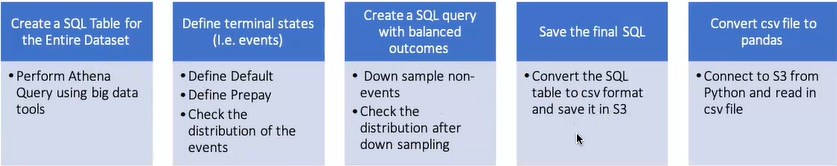

In [1]:
from IPython.display import Image
Image('project1_aws.png')

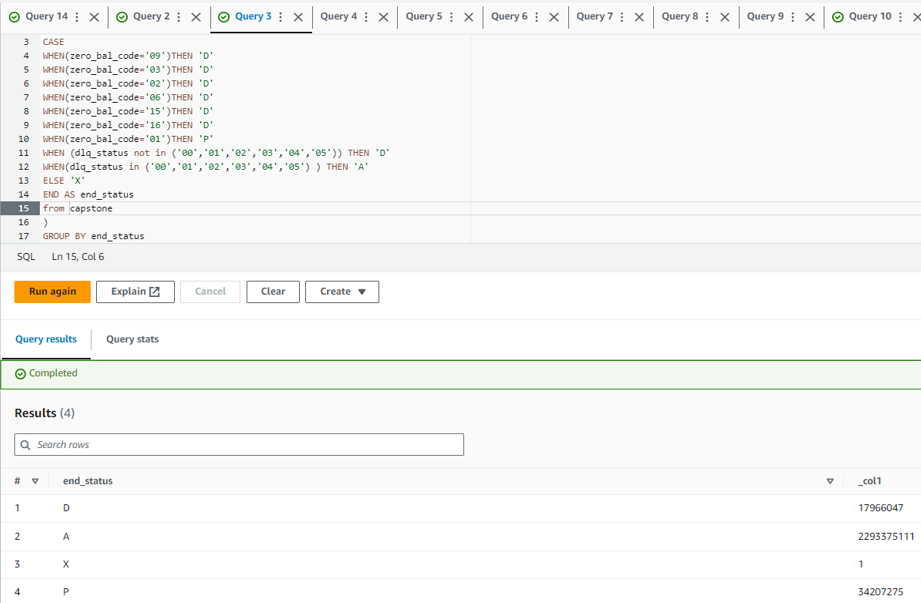

In [2]:
Image('aws_firstsample.png')

- The percentage of Active is 97.78%, Default is 0.77% and Prepay is 1.46%.It was what we expected actually.  
- For to solve this problem we need to do downsampling to for non-event (Active)

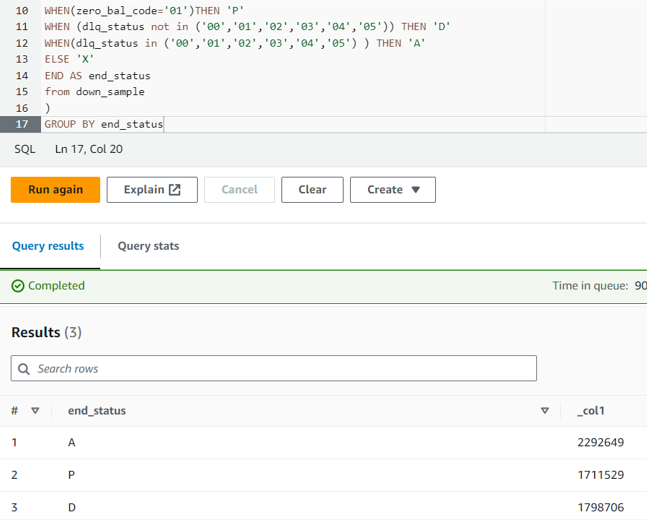

In [11]:
Image('downsampling.png')

- Now the sampled Probabilty  of Active is 39.52%, Default is 31% and Prepay is 29.48%.They are more close eachother.
- Down sample event's and non- events to get similar distribution for each outcome.  
- I need to save the final table in CSV for to use building a model.

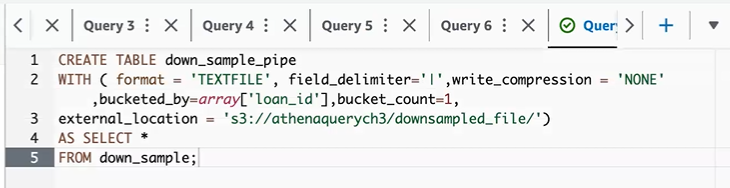

In [3]:
Image('save_textfile.png')

## Libraries

In [4]:
! pip install boto3 --user


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import boto3
import pandas as pd

In [6]:
col_names=['pool_id',
          'loan_id',
          'act_period',
          'channel',
          'seller',
          'servicer',
'master_servicer',
'orig_rate',
'curr_rate',
'orig_upb',
'issuance_upb',
'current_upb',
'orig_term',
'orig_date',
'first_pay',
'loan_age',
'rem_months',
'adj_rem_months',
'matr_dt',
'oltv',
'ocltv',
'num_bo',
'dti',
'cscore_b',
'cscore_c',
'first_flag',
'purpose',
'prop',
'no_units',
'occ_stat',
'state',
'msa',
'zip',
'mi_pct',
'product',
'ppmt_flg',
'io',
'first_pay_io',
'mnths_to_amtz_io',
'dlq_status',
'pmt_history',
'mod_flag',
'mi_cancel_flag',
'zero_bal_code',
'zb_dte',
'last_upb',
'rprch_dte',
'curr_schd_prncpl',
'tot_schd_prncpl',
'unschd_prncpl_curr',
'last_paid_installment_date',
'foreclosure_date',
'disposition_date',
'foreclosure_costs',
'property_preservation_and_repair_costs',
'asset_recovery_costs',
'miscellaneous_holding_expenses_and_credits',
'associated_taxes_for_holding_property',
'net_sales_proceeds',
'credit_enhancement_proceeds',
'repurchases_make_whole_proceeds',
'other_foreclosure_proceeds',
'non_interest_bearing_upb',
'principal_forgiveness_amount',
'original_list_start_date',
'original_list_price',
'current_list_start_date',
'current_list_price',
'issue_scoreb',
'issue_scorec',
'curr_scoreb',
'curr_scorec',
'mi_type',
'serv_ind',
'current_period_modification_loss_amount',
'cumulative_modification_loss_amount',
'current_period_credit_event_net_gain_or_loss',
'cumulative_credit_event_net_gain_or_loss',
'homeready_program_indicator',
'foreclosure_principal_write_off_amount',
'relocation_mortgage_indicator',
'zero_balance_code_change_date',
'loan_holdback_indicator',
'loan_holdback_effective_date',
'delinquent_accrued_interest',
'property_inspection_waiver_indicator',
'high_balance_loan_indicator',
'arm_5_yr_indicator',
'arm_product_type',
'months_until_first_payment_reset',
'months_between_subsequent_payment_reset',
'interest_rate_change_date',
'payment_change_date',
'arm_index',
'arm_cap_structure',
'initial_interest_rate_cap',
'periodic_interest_rate_cap',
'lifetime_interest_rate_cap',
'margin',
'balloon_indicator',
'plan_number',
'forbearance_indicator',
'high_loan_to_value_hltv_refinance_option_indicator',
'deal_name',
're_procs_flag',
'adr_type',
'adr_count',
'adr_upb',
'random',
'threshold']

In [7]:
col_classes=['str',
'str',
'object',
'str',
'str',
'str',
'str',
'float',
'float',
'float',
'float',
'float',
'float',
'str',
'str',
'float',
'float',
'float',
'str',
'float',
'float',
'float',
'float',
'float',
'float',
'str',
'str',
'str',
'float',
'str',
'str',
'str',
'str',
'float',
'str',
'str',
'str',
'str',
'float',
'str',
'str',
'str',
'str',
'str',
'str',
'float',
'str',
'float',
'float',
'float',
'str',
'str',
'str',
'float',
'float',
'float',
'float',
'float',
'float',
'float',
'float',
'float',
'float',
'float',
'str',
'float',
'str',
'float',
'float',
'float',
'float',
'float',
'str',
'str',
'float',
'float',
'float',
'float',
'str',
'float',
'str',
'str',
'str',
'str',
'float',
'str',
'str',
'str',
'str',
'float',
'float',
'str',
'str',
'str',
'str',
'float',
'float',
'float',
'float',
'str',
'float',
'str',
'str',
'str',
'str',
'str',
'float',
'float',
'float',
'float']

In [8]:
# The S3 bucket where I save my Athena results
S3_BUCKET = 'athenacohort3'## my S3 bucket
# The location of the csv file that I saved by the Athena Query

s3_key="000000_0_321d1a9d-54bd-4396-a39b-b69e7ffe89f3_20230902_170936_00056_rpm35" #csv location

#####s3://athenacohort3/000000_0_321d1a9d-54bd-4396-a39b-b69e7ffe89f3_20230902_170936_00056_rpm35

In [9]:
s3 = boto3.client('s3')
obj = s3.get_object(Bucket = s3_BUCKET, Key=s3_key)

In [10]:
df = pd.read_csv(obj['Body'], 
                 sep='|', 
                 header=None, 
                 names=col_names, 
                 dtype=col_dict, 
                 na_values=['\\N'],
                 parse_dates=('orig_date', 'first_pay', 'zb_dte', 'act_period'), 
                 index_col=False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798272 entries, 0 to 5798271
Columns: 110 entries, pool_id to threshold
dtypes: float64(56), object(54)
memory usage: 4.8+ GB
